In [1]:
%%time
from main import *
import numpy as np
import cv2
import doctest
import glob


x = []
masks = []
for m in np.sort(glob.glob('**/m_*.png', recursive=True)):
    masks.append(cv2.imread(m, cv2.IMREAD_GRAYSCALE))
for i in np.sort(glob.glob('**/0*.jpg', recursive=True)):
    x.append(cv2.imread(i))

alpha = 255
beta = 1

h, w, _ = x[0].shape

q = np.array([alpha*(1-np.where(m>0, 1, m)) for m in masks])
g = np.zeros((5,5,h,w-1))
for i in range(4):
    for j in range(i+1,5):
        x_diff = np.sum(np.abs(x[i]-x[j]), axis=2)
        g[i,j] = beta*(x_diff[:,:-1]+x_diff[:,1:]) 
        g[j,i] = g[i, j]

f = np.zeros((w, 5, h))
for j in range(w-1):
    f[j+1] = sum_f(q[:,:, w-1-j],g[:,:,:,w-2-j], f[j])


# will store best pic to pick from
k_best = np.zeros((w,h)).astype(int)
k_best[0] = np.argmin(q[:,:,0]+f[-1], axis=0)
for i in range(1, w-1):
    g_ = projector_gK(g[:,:,:,i-1], k_best[i-1])
    val = q[:,:,i]+g_+f[w-2-i]
    k_best[i]=np.argmin(val, axis=0)

# sum pictures
x = np.array(x)
res = projector_XK(x, k_best.T)

cv2.imwrite('7.png', res)


Wall time: 15.7 s


True

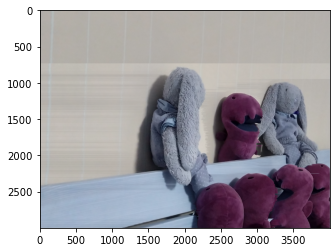

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(res)

In [4]:
np.sort(glob.glob('**/m_*.png', recursive=True))

array(['data_12Mpx\\m_01.png', 'data_12Mpx\\m_02.png',
       'data_12Mpx\\m_03.png', 'data_12Mpx\\m_04.png',
       'data_12Mpx\\m_05.png'], dtype='<U19')